In [2]:
from os import environ

from keras.models import load_model

environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

/home/eduardo/anaconda3/envs/PI2/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Loading model

In [3]:
my_model = load_model(filepath=r'./treino')

In [4]:
print(my_model.summary(), '\n')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 16)        2320      
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 16)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 8)         1160      
__________

Showing parameters: Weights and Biases

In [5]:
print('Ultimo biases do nó:')
print(my_model.get_weights()[-1])
print('Ultimo peso do nó:')
print(my_model.get_weights()[-2])

Ultimo biases do nó:
[ 0.01941353  0.2742553  -0.19733146 -0.04577689  0.15784149 -0.13448969
  0.04253473 -0.14260545 -0.15282482  0.17898303]
Ultimo peso do nó:
[[ 0.1429835  -0.23503765  0.43475094 -0.2727575  -0.21793702 -0.06838153
  -0.03540165  0.33331257  0.37543678 -0.3152067 ]
 [ 0.29908547 -0.2630477   0.558892    0.17072164 -0.03531223 -0.29018426
   0.28205967  0.26362726 -0.05995414 -0.379871  ]
 [-0.18892187 -0.48826563 -0.45760217  0.39354846 -0.46005005  0.27765086
   0.32770923  0.42214578  0.15966111  0.3561019 ]
 [ 0.8256103   0.15098314  0.1983746   0.1942027  -0.4669759   0.54085606
  -0.33500698  0.10934098  0.36957255 -0.1995522 ]
 [ 0.1891081  -0.7192777  -0.3093274  -0.55820835  0.55467105  0.14403017
  -0.18469524  0.3257529   0.03984491  0.32148975]
 [-0.34519824  1.08595     0.13675241 -0.07034612  0.13357444  0.2966259
   0.3204577   0.03026984  0.33190045  0.13603543]
 [ 0.06139607 -0.10338135  0.0713526  -0.14065373 -0.29460484  0.08056328
   0.33292148 

# Loading MNIST dataset


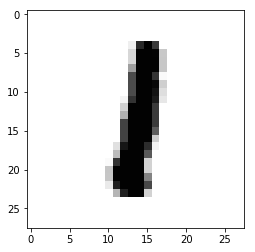

In [14]:
from keras.datasets import mnist

from numpy import random

import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
rand_n = random.randint(0, 10000)
rand_i = test_images[rand_n]
plt.imshow(rand_i, cmap='Greys')
plt.show()



# Prevendo uma imagem aleatória

In [15]:
pred = my_model.predict(rand_i.reshape(1, 28, 28, 1), batch_size=1)
print('The Random number Imagei Prediction is: {}'.format(pred))

The Random number Imagei Prediction is: [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


# Evaluation test over test dataset

In [16]:
from keras.utils import to_categorical

test_images = test_images.reshape((10000, 28, 28, 1))
test_labels = to_categorical(test_labels)
(eval_1, eval_acc) = my_model.evaluate(test_images, y=test_labels, batch_size=10000)
print('Evaluation Accuracy is: {:4.2f}%'.format(eval_acc*100))

10000/10000 [==============================] - 2s 168us/step
Evaluation Accuracy is: 80.51%
